# MPATE-GE 2623 - Music Information Retrieval
## Homework 1

**Instructions:**

1. Complete parts 1 through 5, filling in code in the `utils.py` file where indicated **# YOUR CODE HERE** or responses in `this notebook` where marked with **# YOUR RESPONSE HERE** or **# YOUR CODE HERE**.
2. **Document** your code. Add comments explaining what the different parts of your code are doing.
3. If you copy code from external resources (e.g. librosa's examples), include references as comments.
4. When finished, commit and push this completed notebook file along with the `utils.py` file to your GitHub repository corresponding to this homework.
5. IMPORTANT: do not modify any of the provided code.

**How to work with the `utils.py` file and Google Colab:**

You can run your code remotely with Google Colab if you add the `utils.py` file to your files' folder (search for the folder icon in the menu on the left). But **CAREFUL**, you should copy any changes you make to `utils.py` in Colab to a local copy. Each time you re-start a session the changes of any file in the files folder are lost.

**Grading:**

- This homework is worth 10 points.
- Each function you code in `utils.py` is worth 1 point, for a total of 7 points.
- Each answer in part 5 is worth 1 point, for a total of 3 points.
- Points will be automatically assigned when passing tests, and manually assigned when it comes to your written responses.

**Academic integrity:**

Remember that this homework should be authored by you only. It's ok to discuss with classmates but you have to submit your own original solution.


## Sound Classification for Instrument Recognition
---

In this homework, we will explore the task of recognizing musical instruments based solely on their sound profiles. This involves distinguishing the nuanced tonal characteristics that each instrument produces, such as the sharp resonance of a violin versus the deep hum of a cello or the distinct timbre of a flute compared to a clarinet.

Starting from an available dataset of samples from different instruments, we will extract timbre-related features from the audio. Once processed, the data will be segmented into training, validation, and testing sets to ensure the model's robustness and generalization capabilities.

Using a simple model, we will analyze and critic its performance, trying to explain its behaviour to be able to improve it in the future.

In [1]:
# We will use mirdata to load and handle the data
# See https://mirdata.readthedocs.io/en/stable/source/overview.html
!pip install mirdata # install mirdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=80d890961253b9853116d15e2db885df8bbf44a89bff883e0982d769855a8d94
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64900 sha256=0f2217e14904dbc0f3e796f0d2e54b9900189d5d2f0af65873ea04b7e721cdb5
  Stored in directory: /root/.cache/pip/wheels/28/9a/f7/fb38

In [2]:
# This notebook is for visualization and written answers only
# Your code should go in utils.py
import utils as u # to use the functions from utils, do u.function()

In [3]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1 - Load the data and split it





For this assignment we will use a subset of the Medley-Solos-DB dataset:

<blockquote>
V. Lostanlen, C.E. Cella. Deep convolutional networks on the pitch spiral for musical instrument recognition. Proceedings of the International Society for Music Information Retrieval Conference (ISMIR), 2016.
</blockquote>

This dataset is accessible to you for this homework in
[Google Drive](https://drive.google.com/file/d/1D8ji0ntQ2P72znec_7y9qdyNhXUtAslM/view?usp=sharing). To use it with this Colab notebook, you should download it and upload a copy on your Google Drive. You should create a `mir_datasets` folder and put the dataset there so it is accesible at `/content/drive/MyDrive/mir_datasets/medley_solos_db`.

### Part 1-A: Load the data using mirdata

In [5]:
# This snippet mounts your Drive so you can work with the dataset in it
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
data_home = "/content/drive/MyDrive/mir_datasets/mini_medley_solos_db"
dataset = u.load_data(data_home)

In [7]:
# Check that the data loads correctly by loading a file
dataset.track('68d07e70-ce82-5800-f6e9-7619afaaacca').audio

(array([0.05877648, 0.07739696, 0.06003392, ..., 0.00279894, 0.00765386,
        0.01483029], dtype=float32),
 22050)

### Part 1-B: Divide the dataset into train, test, and validation splits




In [8]:
# run this to create the track lists
tracks_train, tracks_validate, tracks_test = u.split_data(dataset.load_tracks())

print("There are {} tracks in the trainbing set".format(len(tracks_train)))
print("There are {} tracks in the validation set".format(len(tracks_validate)))
print("There are {} tracks in the test set".format(len(tracks_test)))

There are 584 tracks in the trainbing set
There are 349 tracks in the validation set
There are 1224 tracks in the test set


## Part 2: Extract Features


### Part 2-A: Compute the MFCCs of a track


In [9]:
track = dataset.track('68d07e70-ce82-5800-f6e9-7619afaaacca')
y_test, fs_test = track.audio

mfcc = u.compute_mfccs(y_test, fs_test)
print("{} time frames, {} mfcc coefficients".format(mfcc.shape[0], mfcc.shape[1]))

129 time frames, 19 mfcc coefficients


In [10]:
print(mfcc)

[[136.21187     9.6748     11.945927  ...  12.31632     3.9818468
    1.8055836]
 [153.32935   -31.639149    9.034548  ...  12.088223    4.5519133
   -1.5009463]
 [151.36557   -27.870293   11.272245  ...  16.983894   12.299767
    6.263132 ]
 ...
 [106.04661    12.016825  -11.142719  ...  41.80552    50.770973
   42.934055 ]
 [106.69629     4.946666  -12.687835  ...  40.048676   50.778015
   41.699295 ]
 [136.92305    15.469318    7.80909   ...  12.01635    18.463034
   16.883736 ]]


In [11]:
print(mfcc[:,0])

[136.21187  153.32935  151.36557  142.77704  147.68506  146.54025
 143.41612  139.55243  119.48826  118.52585  112.458015 115.779144
 110.19256   99.09914  105.50307  112.289955 109.053734 130.79575
 142.85461  142.92151  157.21802  156.95413  154.76367  153.3414
 150.10968  145.10931  145.46078  147.65057  134.91594  160.89893
 154.59904  153.5749   155.849    152.87741  152.60565  156.43079
 144.64624  145.7594   153.38785  156.55623  178.00171  154.95563
 152.5907   155.84433  165.26599  167.19046  160.81808  155.49724
 161.36487  157.57272  152.1626   145.988    143.35823  164.84383
 152.61888  152.897    154.37628  153.01073  151.67102  144.8774
 145.2261   139.9805   130.82799  135.07115  141.65103  147.24419
 160.23547  160.0682   161.68126  158.47545  155.99658  153.12177
 156.05103  151.89737  145.25772  150.25948  149.1717   143.03093
 150.45796  141.24039  137.09393  146.09494  142.6029    99.85237
 140.24837  138.42186  127.03859  141.65562  132.95032  131.414
 134.2439   1

In [12]:
len(mfcc[:,0]) #rows

129

In [13]:
len(mfcc[0,:]) #columns

19

### Part 2-B: Compute summary statistics




In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

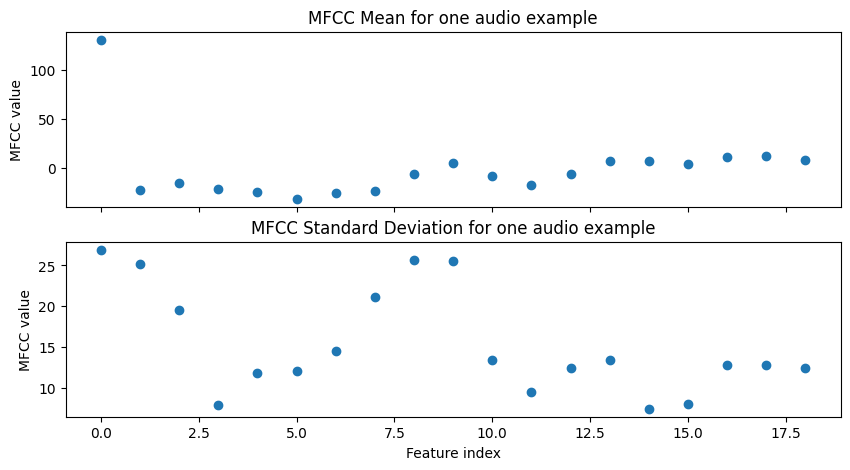

In [15]:
# test your function by running this code
mean, std = u.get_stats(mfcc)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)
ax1.plot(np.arange(len(mean)), mean, 'o')
ax1.set_title("MFCC Mean for one audio example")
ax1.set_ylabel("MFCC value")
ax2.plot(np.arange(len(std)), std, 'o')
ax2.set_title("MFCC Standard Deviation for one audio example")
ax2.set_xlabel("Feature index")
ax2.set_ylabel("MFCC value")

plt.show()

## Part 3: Prepare the Data


### Part 3-A: Compute features for all data and reshape





In [16]:
print(tracks_train[1])

Track(
  audio_path="...asets/mini_medley_solos_db/audio/Medley-solos-DB_training-0_7c416d4b-2645-5033-f0fd-39aec452f809.wav",
  track_id="7c416d4b-2645-5033-f0fd-39aec452f809",
  audio: The track's audio

        Returns,
  instrument: ,
  instrument_id: ,
  song_id: ,
  subset: ,
)


In [19]:
# run this to obtain features and labels for each data split
# this can take some time.
X_raw_train, Y_train = u.get_features_and_labels(tracks_train)
X_raw_validate, Y_validate = u.get_features_and_labels(tracks_validate)
X_raw_test, Y_test = u.get_features_and_labels(tracks_test)

# save features so you don't have to run this again
np.save('X_raw_train.npy', X_raw_train)
np.save('X_raw_validate.npy', X_raw_validate)
np.save('X_raw_test.npy', X_raw_test)

np.save('Y_train.npy', Y_train)
np.save('Y_validate.npy', Y_validate)
np.save('Y_test.npy', Y_test)

### Part 3-B: Normalize the Data



In [20]:
# We normalize all features with the stats of the training data for assessing generalization

# Load here the data if you saved the features!
# ....

mu, sigma = u.get_stats(X_raw_train)

X_train = u.normalize(X_raw_train, mu, sigma)
X_validate = u.normalize(X_raw_validate, mu, sigma)
X_test = u.normalize(X_raw_test, mu, sigma)

## Part 4: Training and validation

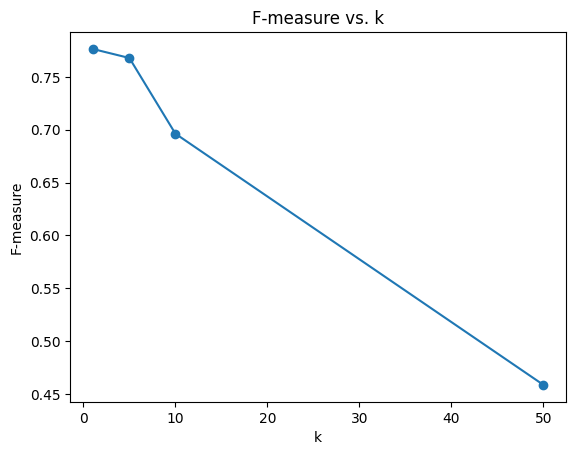

1


In [21]:
# run this to train the models
knn_clf, best_k = u.fit_knn(X_train, Y_train, X_validate, Y_validate)
print(best_k)

## Part 5: Analysis

In [22]:
from sklearn.metrics import f1_score

### Part 5-A: Compute predictions and evaluate


1. Predict the labels for the test set.
2. Compute & print the average f1_score (or f_measure) in the dataset.

Hint: Look at the documentation of Sklearn on how to do the predictions, evaluation, etc.

In [23]:
# YOUR CODE HERE
Y_pred = knn_clf.predict(X_test)
f1_score(Y_test, Y_pred, average='micro')

0.6086601307189542

`# YOUR RESPONSE HERE`

### Part 5-B: Compute a confusion matrix
1. Compute the confusion matrix (use `sklearn.metrics.confusion_matrix`)
2. Plot the confusion matrix (see the example [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)).


[[0.02696078 0.00081699 0.00326797 0.00408497 0.01633987 0.
  0.00081699 0.00735294]
 [0.         0.0620915  0.00081699 0.         0.0130719  0.
  0.         0.00245098]
 [0.00081699 0.         0.07679739 0.         0.00081699 0.00163399
  0.         0.0130719 ]
 [0.02369281 0.00408497 0.0130719  0.02696078 0.09640523 0.
  0.00081699 0.09395425]
 [0.         0.00081699 0.00081699 0.         0.20506536 0.
  0.         0.00653595]
 [0.         0.00735294 0.00245098 0.         0.00980392 0.00081699
  0.         0.00571895]
 [0.00163399 0.         0.00163399 0.00408497 0.00081699 0.
  0.01552288 0.00980392]
 [0.00245098 0.00816993 0.00163399 0.00408497 0.0245098  0.
  0.00163399 0.19444444]]


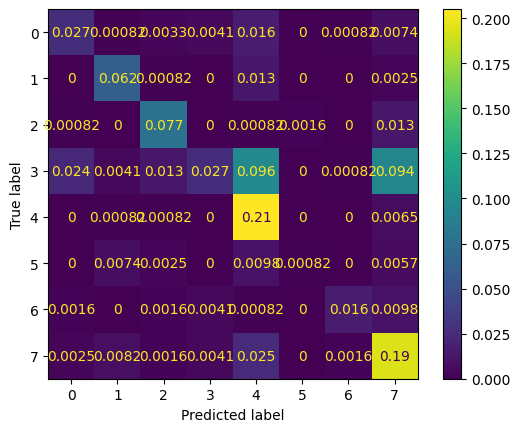

In [29]:
# YOUR CODE HERE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(Y_test, Y_pred, normalize="all", labels=knn_clf.classes_))
cm = confusion_matrix(Y_test, Y_pred, normalize="all", labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [26]:
target_names = ['Clarinet', 'Distorted electric guitar', 'Female singer', 'Flute', 'Piano', 'Tenor saxophone', 'Trumpet', 'Violin']
print(classification_report(Y_test, Y_pred, target_names=target_names))

                           precision    recall  f1-score   support

                 Clarinet       0.49      0.45      0.47        73
Distorted electric guitar       0.75      0.79      0.77        96
            Female singer       0.76      0.82      0.79       114
                    Flute       0.69      0.10      0.18       317
                    Piano       0.56      0.96      0.71       261
          Tenor saxophone       0.33      0.03      0.06        32
                  Trumpet       0.83      0.46      0.59        41
                   Violin       0.58      0.82      0.68       290

                 accuracy                           0.61      1224
                macro avg       0.62      0.56      0.53      1224
             weighted avg       0.63      0.61      0.54      1224



`# YOUR RESPONSE HERE`

### Part 5-C: Perform Error Analysis


1. Which instrument class has the best & worst performance?
2. For the worst source, what other sources are commonly confused? Why?
3. Listen to the audio for examples the classifier got wrong. What do they have in common?

Hint: to listen to the audio you can use `ipd.Audio` from `IPython.display`.

`# YOUR RESPONSE HERE`
ANSWERS:
1. Female singer has the highest evaluation score. The worst performance will be Tenor saxophone.
2. Flute is commonly confused as piano and violin. In the confusion matric, their False Positive are relatively high.